<a href="https://colab.research.google.com/github/Mridu20/wb-population-data-cleaning/blob/main/handling_null_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Handling Null values**

1. Dropping

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/wb_population_total.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   countryiso3code  6525 non-null   object 
 1   date             6650 non-null   int64  
 2   value            6625 non-null   float64
 3   unit             0 non-null      float64
 4   obs_status       0 non-null      float64
 5   decimal          6650 non-null   int64  
 6   indicator.id     6650 non-null   object 
 7   indicator.value  6650 non-null   object 
 8   country.id       6625 non-null   object 
 9   country.value    6650 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 519.7+ KB


In [4]:
df.head()

,countryiso3code,date,value,unit,obs_status,decimal,indicator.id,indicator.value,country.id,country.value
0,AFE,2024,769294618.0,NaN,NaN,0,SP.POP.TOTL,"Population, total",ZH,Africa Eastern and Southern
1,AFE,2023,750503764.0,NaN,NaN,0,SP.POP.TOTL,"Population, total",ZH,Africa Eastern and Southern
2,AFE,2022,731821393.0,NaN,NaN,0,SP.POP.TOTL,"Population, total",ZH,Africa Eastern and Southern
3,AFE,2021,713090928.0,NaN,NaN,0,SP.POP.TOTL,"Population, total",ZH,Africa Eastern and Southern
4,AFE,2020,694446100.0,NaN,NaN,0,SP.POP.TOTL,"Population, total",ZH,Africa Eastern and Southern


In [5]:
df.shape

(6650, 10)

In [6]:
df.isnull()

,countryiso3code,date,value,unit,obs_status,decimal,indicator.id,indicator.value,country.id,country.value
0,False,False,False,True,True,False,False,False,False,False
1,False,False,False,True,True,False,False,False,False,False
2,False,False,False,True,True,False,False,False,False,False
3,False,False,False,True,True,False,False,False,False,False
4,False,False,False,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
6645,False,False,False,True,True,False,False,False,False,False
6646,False,False,False,True,True,False,False,False,False,False
6647,False,False,False,True,True,False,False,False,False,False
6648,False,False,False,True,True,False,False,False,False,False


In [7]:
(df.isnull().sum()/df.shape[0])*100

,0
countryiso3code,1.879699
date,0.000000
value,0.375940
unit,100.000000
obs_status,100.000000
decimal,0.000000
indicator.id,0.000000
indicator.value,0.000000
country.id,0.375940
country.value,0.000000


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


<Axes: >

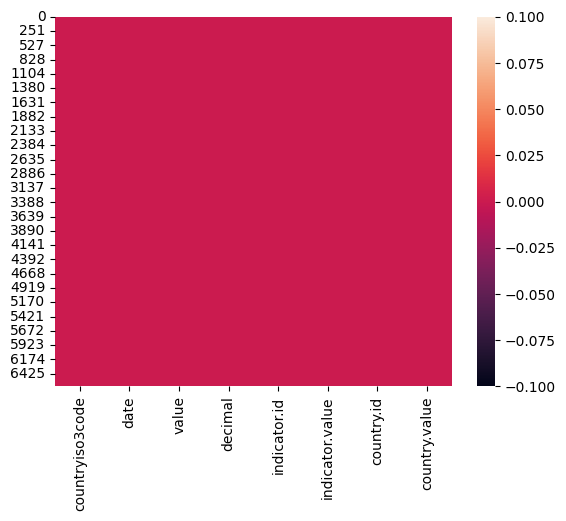

In [15]:
sns.heatmap(df.isnull())

In [10]:
df.drop(columns=["unit","obs_status"],inplace=True)

In [11]:
df.shape

(6650, 8)

In [12]:
(df.isnull().sum().sum()/(df.shape[0]*df.shape[1]))*100

np.float64(0.3289473684210526)

In [14]:
df.dropna(inplace=True)

In [17]:
df.shape

(6500, 8)

In [18]:
((6650-6500)/6650)*100

2.2556390977443606

2.Imputing category data

In [19]:
ds = pd.read_csv("/wb_population_total (1).csv")

In [20]:
ds.head()

,countryiso3code,date,value,unit,obs_status,decimal,indicator.id,indicator.value,country.id,country.value
0,AFE,2024,769294618.0,NaN,NaN,0,SP.POP.TOTL,"Population, total",ZH,Africa Eastern and Southern
1,AFE,2023,750503764.0,NaN,NaN,0,SP.POP.TOTL,"Population, total",ZH,Africa Eastern and Southern
2,AFE,2022,731821393.0,NaN,NaN,0,SP.POP.TOTL,"Population, total",ZH,Africa Eastern and Southern
3,AFE,2021,713090928.0,NaN,NaN,0,SP.POP.TOTL,"Population, total",ZH,Africa Eastern and Southern
4,AFE,2020,694446100.0,NaN,NaN,0,SP.POP.TOTL,"Population, total",ZH,Africa Eastern and Southern


In [22]:
ds.drop(columns=["unit","obs_status"],inplace=True)

In [30]:
ds.head(10)

,countryiso3code,date,value,decimal,indicator.id,indicator.value,country.id,country.value
0,AFE,2024,769294618.0,0,SP.POP.TOTL,"Population, total",ZH,Africa Eastern and Southern
1,AFE,2023,750503764.0,0,SP.POP.TOTL,"Population, total",ZH,Africa Eastern and Southern
2,AFE,2022,731821393.0,0,SP.POP.TOTL,"Population, total",ZH,Africa Eastern and Southern
3,AFE,2021,713090928.0,0,SP.POP.TOTL,"Population, total",ZH,Africa Eastern and Southern
4,AFE,2020,694446100.0,0,SP.POP.TOTL,"Population, total",ZH,Africa Eastern and Southern
5,AFE,2019,675950189.0,0,SP.POP.TOTL,"Population, total",ZH,Africa Eastern and Southern
6,AFE,2018,657801085.0,0,SP.POP.TOTL,"Population, total",ZH,Africa Eastern and Southern
7,AFE,2017,640058741.0,0,SP.POP.TOTL,"Population, total",ZH,Africa Eastern and Southern
8,AFE,2016,623369401.0,0,SP.POP.TOTL,"Population, total",ZH,Africa Eastern and Southern
9,AFE,2015,607123269.0,0,SP.POP.TOTL,"Population, total",ZH,Africa Eastern and Southern


In [24]:
ds.isnull().sum()

,0
countryiso3code,125
date,0
value,25
decimal,0
indicator.id,0
indicator.value,0
country.id,25
country.value,0


In [25]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   countryiso3code  6525 non-null   object 
 1   date             6650 non-null   int64  
 2   value            6625 non-null   float64
 3   decimal          6650 non-null   int64  
 4   indicator.id     6650 non-null   object 
 5   indicator.value  6650 non-null   object 
 6   country.id       6625 non-null   object 
 7   country.value    6650 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 415.8+ KB


In [50]:
dt["countryiso3code"].mode()

,countryiso3code
0,ABW
1,AFE
2,AFG
3,AFW
4,AGO
...,...
256,XKX
257,YEM
258,ZAF
259,ZMB


In [43]:
ds.fillna(method="bfill")

/tmp/ipython-input-3913460501.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ds.fillna(method="bfill")


,countryiso3code,date,value,decimal,indicator.id,indicator.value,country.id,country.value
0,AFE,2024,769294618.0,0,SP.POP.TOTL,"Population, total",ZH,Africa Eastern and Southern
1,AFE,2023,750503764.0,0,SP.POP.TOTL,"Population, total",ZH,Africa Eastern and Southern
2,AFE,2022,731821393.0,0,SP.POP.TOTL,"Population, total",ZH,Africa Eastern and Southern
3,AFE,2021,713090928.0,0,SP.POP.TOTL,"Population, total",ZH,Africa Eastern and Southern
4,AFE,2020,694446100.0,0,SP.POP.TOTL,"Population, total",ZH,Africa Eastern and Southern
...,...,...,...,...,...,...,...,...
6645,ZWE,2004,12365896.0,0,SP.POP.TOTL,"Population, total",ZW,Zimbabwe
6646,ZWE,2003,12232323.0,0,SP.POP.TOTL,"Population, total",ZW,Zimbabwe
6647,ZWE,2002,12087653.0,0,SP.POP.TOTL,"Population, total",ZW,Zimbabwe
6648,ZWE,2001,11971901.0,0,SP.POP.TOTL,"Population, total",ZW,Zimbabwe


In [32]:
#ds.fillna(method="ffill").head(10)

In [38]:
#ds["country.id"].mode()

In [44]:
ds.isnull().sum()

,0
countryiso3code,0
date,0
value,0
decimal,0
indicator.id,0
indicator.value,0
country.id,0
country.value,0


3.scikit learn

In [45]:
dt = pd.read_csv("/content/wb_population_total (2).csv")

In [46]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   countryiso3code  6525 non-null   object 
 1   date             6650 non-null   int64  
 2   value            6625 non-null   float64
 3   unit             0 non-null      float64
 4   obs_status       0 non-null      float64
 5   decimal          6650 non-null   int64  
 6   indicator.id     6650 non-null   object 
 7   indicator.value  6650 non-null   object 
 8   country.id       6625 non-null   object 
 9   country.value    6650 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 519.7+ KB


In [47]:
dt.isnull().sum()

,0
countryiso3code,125
date,0
value,25
unit,6650
obs_status,6650
decimal,0
indicator.id,0
indicator.value,0
country.id,25
country.value,0


In [48]:
dt.drop(columns=["unit","obs_status"],inplace=True)

In [49]:
dt.isnull().sum()

,0
countryiso3code,125
date,0
value,25
decimal,0
indicator.id,0
indicator.value,0
country.id,25
country.value,0


In [55]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   countryiso3code  6525 non-null   object 
 1   date             6650 non-null   int64  
 2   value            6625 non-null   float64
 3   decimal          6650 non-null   int64  
 4   indicator.id     6650 non-null   object 
 5   indicator.value  6650 non-null   object 
 6   country.id       6625 non-null   object 
 7   country.value    6650 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 415.8+ KB


In [56]:
dt.select_dtypes(include=["float64", "int64"]).columns

Index(['date', 'value', 'decimal'], dtype='object')

In [57]:
from sklearn.impute import SimpleImputer

In [60]:
si = SimpleImputer(strategy="mean")

In [62]:
ar = si.fit_transform(dt[["value"]])

In [65]:
dt_new = pd.DataFrame(ar, columns=["value"])

In [66]:
dt_new.isnull().sum()

,0
value,0
